In [1]:
#加载数据
import pandas as pd
import numpy as np
data = pd.read_csv("usa_housing_price.csv")

In [2]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


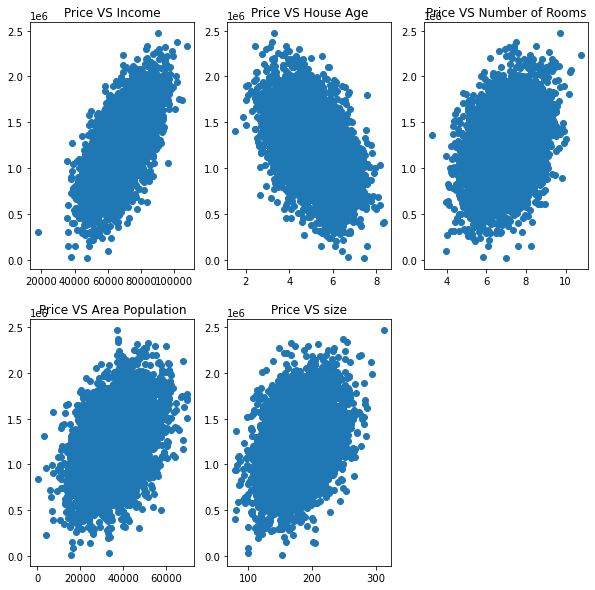

In [8]:
#展示散点图
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure( figsize = (10,10))
fig1 = plt.subplot(231)
plt.scatter(data.loc[: , 'Avg. Area Income'],data.loc[: , 'Price'])
plt.title("Price VS Income")

fig1 = plt.subplot(232)
plt.scatter(data.loc[: , 'Avg. Area House Age'],data.loc[: , 'Price'])
plt.title("Price VS House Age")

fig3 =plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 =plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 =plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show() 

# 预测


In [10]:
x = data.loc[: , 'size']
y = data.loc[: , "Price"]
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [13]:
X = np.array(x).reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(X,y)

LinearRegression()

In [15]:
y_predict_1 = LR1.predict(X)
print(y_predict_1)

[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


## 可视化 评估结果

In [18]:
from  sklearn.metrics import mean_squared_error,r2_score
MSE_1 = mean_squared_error(y,y_predict_1)
R2_1 = r2_score(y,y_predict_1)
print(MSE_1,R2_1)

108771672553.6264 0.1275031240418234


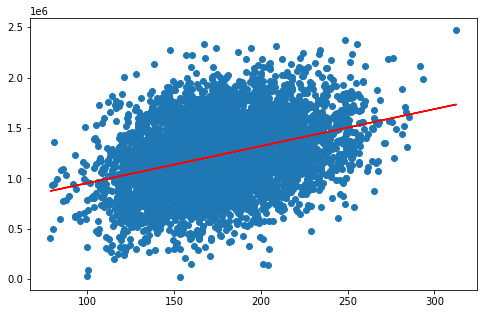

In [19]:
fig_reslut = plt.figure(figsize = (8,5))
plt.scatter(X,y)
plt.plot(X,y_predict_1,"r")
plt.show()

# 多因子预测

In [20]:
X_multi = data.drop(["Price"],axis=1)
X_multi

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659
...,...,...,...,...,...
4995,60567.94414,3.169638,6.137356,22837.36103,161.641403
4996,78491.27543,4.000865,6.576763,25616.11549,159.164596
4997,63390.68689,3.749409,4.805081,33266.14549,139.491785
4998,68001.33124,5.465612,7.130144,42625.62016,184.845371


In [21]:
LR_multi = LinearRegression()
LR_multi.fit(X_multi,y)


LinearRegression()

In [22]:
y_predict_multi = LR_multi.predict(X_multi)

In [23]:
MSE_multi  = mean_squared_error(y,y_predict_multi )
R2_multi  = r2_score(y,y_predict_multi )
print(MSE_multi ,R2_multi )
#R2结果趋近于1

10219846512.177862 0.9180229195220739


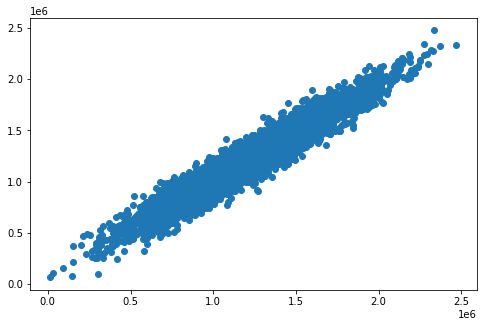

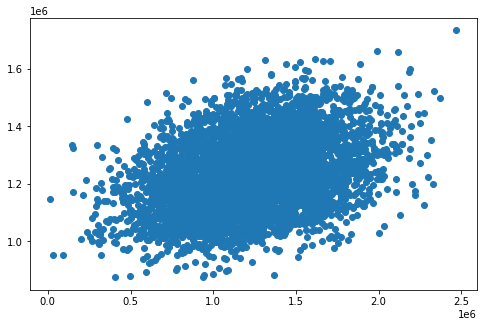

In [26]:
#多因子
fig_reslut_multi = plt.figure(figsize = (8,5))
plt.scatter(y,y_predict_multi)
plt.show()
#单因子
fig_reslut_multi2 = plt.figure(figsize = (8,5))
plt.scatter(y,y_predict_1)
plt.show()
#多因子效果更好

# 预测

In [27]:
X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)
print(X_test)

[[65000     5     5 30000   200]]


In [28]:
y_test = LR_multi.predict(X_test)
print(y_test)

[817052.19516299]
